# **Credit Scoring Prediction with Logistic Regression**

## **Problem Statement**

Assessing a borrower's creditworthiness is crucial for reducing default risk for financial institutions. Yet, simply relying on predefined rules may not always provide the most accurate predictions. To improve the decision-making, we used Logistic Regression (supervised machine learning algorithm for binary classification) to identify whether the borrow is capable to repay debt, based on various financial and demographic factors. 

In this study, we analyzed key factors such as income, credit history, outstanding loan balance and employment status of the applicant to predict whether he/she is likely to default. This helps financial institutions make informed lending decisions while minimizing risk, based on a reliable and data-driven approach.

### **(1) Import Libaries**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, recall_score
from sklearn.preprocessing import MinMaxScaler 
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
!pip install shap

### **(2) Data Cleaning and Preprocessing**
First, we clean the data by removing the duplicates, checking for missing values and processing categorical variable (Employment). The original Employment column is dropped, and the new dummy columns (Employed, Self-Employed, Unemployed) are converted from boolean values (True/False) into numeric form (1/0). This is followed by distribution plots of every attribute. Defaulter is represented as Repay_Loan = 0.

In [32]:
# Read the credit scoring dataset
csv_path = 'https://raw.githubusercontent.com/cckmwong-data/credit_scoring/refs/heads/main/credit_scoring2.csv'
df = pd.read_csv(csv_path)
df

,Income,Credit_History,Outstanding_Balance,Employment,Repay_Loan
0,57450.71000,0.410000,30683.79000,Employed,1
1,47926.04000,0.070000,26041.21000,Employed,1
2,59715.33000,0.350000,43036.39000,Employed,0
3,72845.45000,0.110000,5205.56000,Unemployed,1
4,46487.70000,0.810000,32592.33000,Employed,1
...,...,...,...,...,...
2673,27062.98006,1.019931,23248.89077,Employed,0
2674,52826.32462,0.052374,46287.31686,Employed,0
2675,36495.92188,0.350995,24246.05548,Self-Employed,0
2676,39903.00804,0.019739,36657.01343,Employed,0


In [33]:
# check any missing data
df.isnull().sum()

Income                 0
Credit_History         0
Outstanding_Balance    0
Employment             0
Repay_Loan             0
dtype: int64

In [34]:
# remove any duplicates
df = df.drop_duplicates()

In [35]:
# Transform categorical variables 
dummy = pd.get_dummies(df['Employment'])
data = pd.concat([df, dummy], axis=1)

data

,Income,Credit_History,Outstanding_Balance,Employment,Repay_Loan,Employed,Self-Employed,Unemployed
0,57450.71000,0.410000,30683.79000,Employed,1,True,False,False
1,47926.04000,0.070000,26041.21000,Employed,1,True,False,False
2,59715.33000,0.350000,43036.39000,Employed,0,True,False,False
3,72845.45000,0.110000,5205.56000,Unemployed,1,False,False,True
4,46487.70000,0.810000,32592.33000,Employed,1,True,False,False
...,...,...,...,...,...,...,...,...
2673,27062.98006,1.019931,23248.89077,Employed,0,True,False,False
2674,52826.32462,0.052374,46287.31686,Employed,0,True,False,False
2675,36495.92188,0.350995,24246.05548,Self-Employed,0,False,True,False
2676,39903.00804,0.019739,36657.01343,Employed,0,True,False,False


In [36]:
# Drop the original column of Employment
data.drop("Employment", axis=1, inplace=True)

# Convert the labels of True and False into 1 and 0 respectively
data['Employed'] = np.where(data['Employed'] == True, 1, 0)
data['Self-Employed'] = np.where(data['Self-Employed'] == True, 1, 0)
data['Unemployed'] = np.where(data['Unemployed'] == True, 1, 0)

data

,Income,Credit_History,Outstanding_Balance,Repay_Loan,Employed,Self-Employed,Unemployed
0,57450.71000,0.410000,30683.79000,1,1,0,0
1,47926.04000,0.070000,26041.21000,1,1,0,0
2,59715.33000,0.350000,43036.39000,0,1,0,0
3,72845.45000,0.110000,5205.56000,1,0,0,1
4,46487.70000,0.810000,32592.33000,1,1,0,0
...,...,...,...,...,...,...,...
2673,27062.98006,1.019931,23248.89077,0,1,0,0
2674,52826.32462,0.052374,46287.31686,0,1,0,0
2675,36495.92188,0.350995,24246.05548,0,0,1,0
2676,39903.00804,0.019739,36657.01343,0,1,0,0


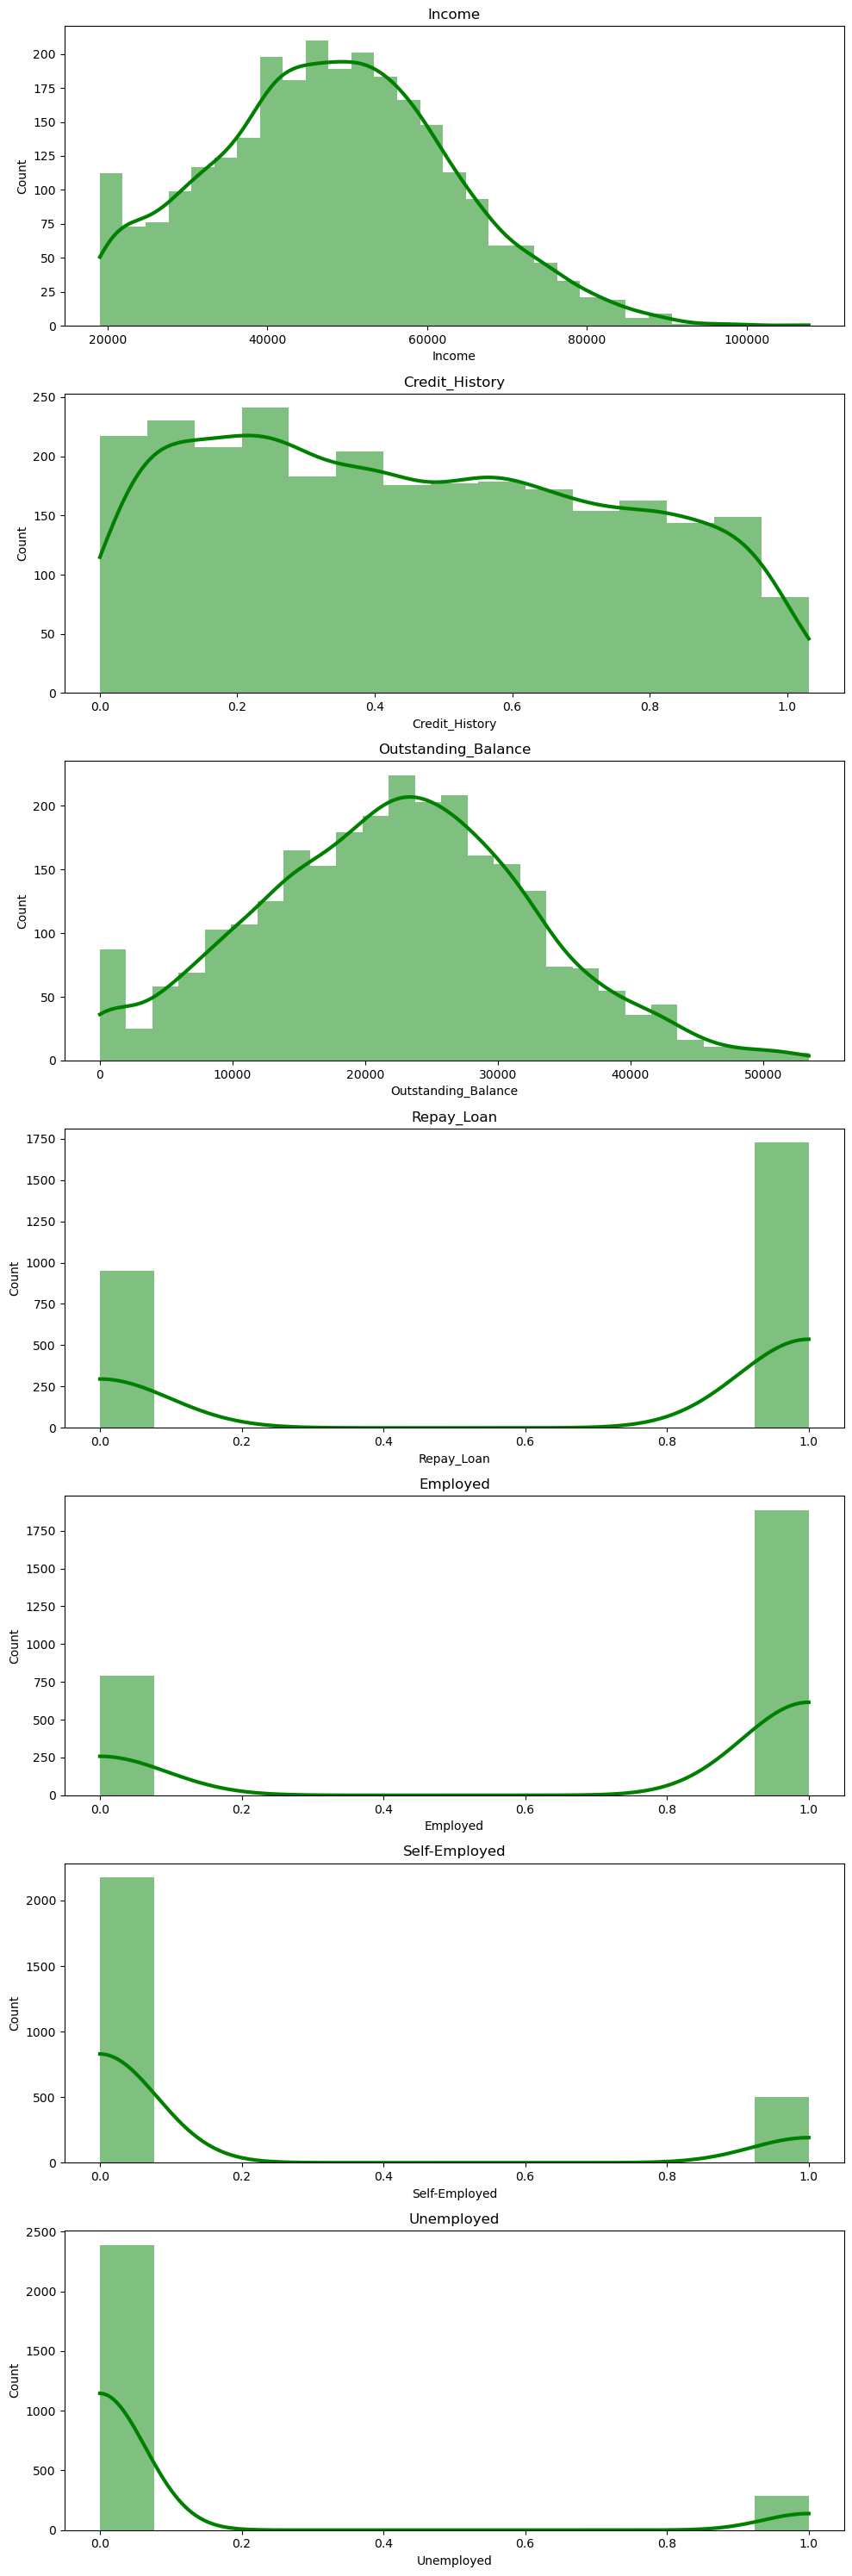

In [37]:
# View the distribution of different values of the columns

plt.figure(figsize=(10,30))

for i in range(len(data.columns)):
  plt.subplot(len(data.columns), 1, i+1) # subplot takes 3 arguments, 1st: no. of rows, 2nd: no. of columns, 3rd: the index of the current plot
  sns.histplot(data[data.columns[i]], kde=True, color="g", line_kws={"color": "b", "lw": 3}, edgecolor=None)
  plt.title(data.columns[i])

plt.tight_layout()

### **(3) Modeling of Logistic Regression**
We split the dataset into training (70%) and test (30%) sets, where the independent variables include income, credit history, outstanding balance, and employment status, while the target variable is whether the loan was repaid. The features are scaled to a 0–1 range using MinMaxScaler to ensure consistent weighting across variables. A logistic regression model with class balancing (to handle any imbalance between repaid and defaulted loans) is then trained on the scaled training data.

In [38]:
# Split the data into training and test set (70% - 30%)
X = data[['Income', 'Credit_History', 'Outstanding_Balance', 'Employed', 'Self-Employed', 'Unemployed']] #independent variables
y = data['Repay_Loan'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
# Create a MinMaxScaler instance and fit it on the training set
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Training the model on the training set
model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

### **(4) Model Testing & Evaluation**
A confusion matrix is plotted to visualize prediction outcomes. The model achieves a recall of 0.84 for defaulters (class 0), meaning it successfully identifies most risky borrowers. It also records a strong PR-AUC score, reflecting its ability to balance precision and recall in the imbalanced dataset, and a very high ROC-AUC of 0.92, showing excellent overall discrimination between repayers and defaulters.

In [41]:
# Forecast the ability of loan repayment using the logistic regression model
predictions = model.predict(X_test)

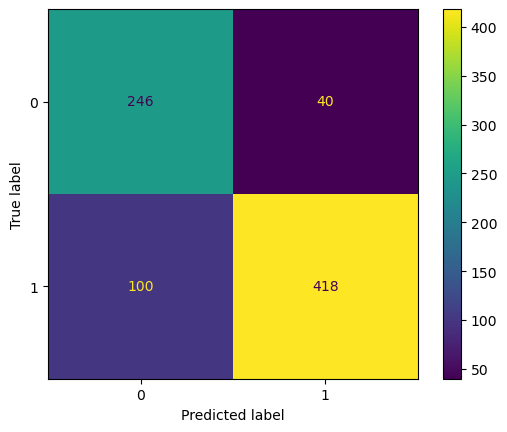

In [42]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [43]:
# Important Evaluation Metrics for the model
# High sensitivity (recall) of 0.86 for catching true defaulters
recall_default = recall_score(y_test, predictions, pos_label=0)
print("Recall of the model: ", round(recall_default, 2))

y_prob = model.predict_proba(X_test)[:, 1]
ap = average_precision_score(y_test, y_prob)
print("PR-AUC (Precision-Recall Curves):", round(ap, 2))

# The model has outstanding performance in binary classification with very high ROC-AUC score of 0.92
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print('ROC-AUC: ', round(roc_auc, 2))

Recall of the model:  0.86
PR-AUC (Precision-Recall Curves): 0.95
ROC-AUC:  0.92


In [44]:
# A high F1 score shows it is a well-balanced model when handling false positives and false negatives 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       286
           1       0.91      0.81      0.86       518

    accuracy                           0.83       804
   macro avg       0.81      0.83      0.82       804
weighted avg       0.84      0.83      0.83       804



### **(4) Save the Models/ Scaler/ Explainer**

In [45]:
import shap

# Extract the column names as the feature names
feature_names = X.columns  

# Create SHAP explainer with the feature names
explainer = shap.Explainer(model, X_train, feature_names=feature_names)

In [46]:
import pickle
with open("credit_model.pkl", "wb") as f: pickle.dump(model, f)
with open("credit_scaler.pkl", "wb") as f: pickle.dump(scaler, f)
with open("credit_explainer.pkl", "wb") as f: pickle.dump(explainer, f)

## **Conclusion**

Overall, this is a strong model for credit scoring prediction. It leans toward being conservative — better at catching defaulters (high recall for class 0), even if that means occasionally rejecting safe borrowers (moderate precision for class 0). For a bank, this trade-off is often acceptable, since missing defaulters is more costly than rejecting some good customers.